# BRICS Exploring Relationships

#### This script contains

    01 data wrangling
    02 quality and consistency checks
    03 adding new colums
    04 exploring relationships
    05 Geographical Visulization

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'C:\Users\Lenovo\OneDrive\Dokumente\CareerFoundry\Data Immersion\6. Advanced Analytics and Dashboard Design'

In [3]:
# Import Data
df = pd.read_csv(os.path.join(path, 'BRICS', '02 Data', 'Prepared Data', 'world_hapiness_final_with_dots.csv'))


## 01 Data wrangling

    Renaming columns
    

###  Renaming columns


In [4]:
# checking shape
df.shape

(231, 26)

In [5]:
# checking column names
df.columns

Index(['date', 'country', 'continent', 'life_expectancy', 'population',
       'co2_emissions', 'health_expenditure', 'gdp_per_capita',
       'internet_users', 'military_exp', 'open_defecation', 'drinking_water',
       'obesity_among_adults', 'beer_cons_per_capita', 'account_balance',
       'account_balance_GDP', 'debt_GDP', 'gdp', 'share_of_world_GDP_ppp',
       'year', 'health_total', 'military_total', 'debt_total', 'brics_flag',
       'g6_flag', 'us_brics_flag'],
      dtype='object')

In [6]:
# checking data types
df.dtypes


date                       object
country                    object
continent                  object
life_expectancy           float64
population                  int64
co2_emissions             float64
health_expenditure        float64
gdp_per_capita            float64
internet_users            float64
military_exp              float64
open_defecation           float64
drinking_water            float64
obesity_among_adults      float64
beer_cons_per_capita      float64
account_balance           float64
account_balance_GDP       float64
debt_GDP                  float64
gdp                       float64
share_of_world_GDP_ppp    float64
year                        int64
health_total              float64
military_total            float64
debt_total                float64
brics_flag                 object
g6_flag                    object
us_brics_flag              object
dtype: object

#### No need for changing data types nor Transposing data

## 02 Quality & Consistency Checks

    quality checks
    consistency checks

### quality checks

#### mixed type variables

In [7]:
# Überprüfung auf gemischte Datentypen
for col in df.columns.tolist():
    weird = (df[[col]].apply(lambda x: type(x.iloc[0])) != df[[col]].applymap(type)).any(axis=1)
    if len(df[weird]) > 0:
        print(col)

life_expectancy
population
co2_emissions
health_expenditure
gdp_per_capita
internet_users
military_exp
open_defecation
drinking_water
obesity_among_adults
beer_cons_per_capita
account_balance
account_balance_GDP
debt_GDP
gdp
share_of_world_GDP_ppp
year
health_total
military_total
debt_total
brics_flag
g6_flag
us_brics_flag


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_109220\4181605260.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].apply(lambda x: type(x.iloc[0])) != df[[col]].applymap(type)).any(axis=1)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_109220\4181605260.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].apply(lambda x: type(x.iloc[0])) != df[[col]].applymap(type)).any(axis=1)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_109220\4181605260.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].apply(lambda x: type(x.iloc[0])) != df[[col]].applymap(type)).any(axis=1)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_109220\4181605260.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].apply(lambda x: type(x.iloc[0])) != df[[col]].applymap(type)).any(axis=1)
C:\Users\Lenovo\

#### missing values


In [8]:
# Check for columns with missing values
df.isnull().sum()


date                        0
country                     0
continent                   0
life_expectancy             0
population                  0
co2_emissions               0
health_expenditure          0
gdp_per_capita              0
internet_users              0
military_exp                0
open_defecation             0
drinking_water              0
obesity_among_adults        0
beer_cons_per_capita        0
account_balance             0
account_balance_GDP         0
debt_GDP                    4
gdp                         0
share_of_world_GDP_ppp      0
year                        0
health_total                0
military_total              0
debt_total                  4
brics_flag                126
g6_flag                   105
us_brics_flag             105
dtype: int64

In [9]:
# checking missing values by year
df.groupby(['year']).country.nunique()

year
1999    11
2000    11
2001    11
2002    11
2003    11
2004    11
2005    11
2006    11
2007    11
2008    11
2009    11
2010    11
2011    11
2012    11
2013    11
2014    11
2015    11
2016    11
2017    11
2018    11
2019    11
Name: country, dtype: int64

In [10]:
df['country'].value_counts()

country
Brazil                21
Canada                21
China                 21
France                21
Germany               21
India                 21
Italy                 21
Russian Federation    21
South Africa          21
United Kingdom        21
United States         21
Name: count, dtype: int64

#### duplicate values

In [11]:
# creating a subset with duplicates
df_dups = df[df.duplicated()]

In [12]:
# checking for values in the subset
df_dups

# No duplicates found

,date,country,continent,life_expectancy,population,co2_emissions,health_expenditure,gdp_per_capita,internet_users,military_exp,...,debt_GDP,gdp,share_of_world_GDP_ppp,year,health_total,military_total,debt_total,brics_flag,g6_flag,us_brics_flag


### Consistency checks

#### value counts for categorical columns 

In [13]:
df['country'].value_counts(dropna=False)

country
Brazil                21
Canada                21
China                 21
France                21
Germany               21
India                 21
Italy                 21
Russian Federation    21
South Africa          21
United Kingdom        21
United States         21
Name: count, dtype: int64

In [14]:
df['continent'].nunique()

5

In [15]:
df['continent'].value_counts(dropna=False)

continent
Europe           105
North America     42
Asia              42
South America     21
Africa            21
Name: count, dtype: int64

In [16]:
df.columns

Index(['date', 'country', 'continent', 'life_expectancy', 'population',
       'co2_emissions', 'health_expenditure', 'gdp_per_capita',
       'internet_users', 'military_exp', 'open_defecation', 'drinking_water',
       'obesity_among_adults', 'beer_cons_per_capita', 'account_balance',
       'account_balance_GDP', 'debt_GDP', 'gdp', 'share_of_world_GDP_ppp',
       'year', 'health_total', 'military_total', 'debt_total', 'brics_flag',
       'g6_flag', 'us_brics_flag'],
      dtype='object')

## 03 Adding new columns

    Adding new column
    creating subsets g7 and brics

In [17]:
df


,date,country,continent,life_expectancy,population,co2_emissions,health_expenditure,gdp_per_capita,internet_users,military_exp,...,debt_GDP,gdp,share_of_world_GDP_ppp,year,health_total,military_total,debt_total,brics_flag,g6_flag,us_brics_flag
0,1999-12-31,Brazil,South America,70.116000,174790339,1.794550,8.334593,9050.494048,2.870685,1.730726,...,NaN,599.642,3.144,1999,49.977719,10.378161,NaN,brics,NaN,brics
1,2000-12-31,Brazil,South America,70.462000,177196051,1.802410,8.549606,9255.634759,4.528495,1.951882,...,65.561,655.454,3.132,2000,56.038737,12.793692,429.722197,brics,NaN,brics
2,2001-12-31,Brazil,South America,70.813000,179537523,1.769881,8.696857,9560.575067,9.149425,1.895771,...,70.054,559.982,3.101,2001,48.700836,10.615977,392.289790,brics,NaN,brics
3,2002-12-31,Brazil,South America,71.170000,181809244,1.709539,8.188999,9737.277380,13.207586,1.503478,...,78.798,509.798,3.108,2002,41.747354,7.664699,401.710628,brics,NaN,brics
4,2003-12-31,Brazil,South America,71.531000,184006479,1.785372,8.124920,10448.313340,19.073672,1.461268,...,73.823,558.232,3.021,2003,45.355903,8.157268,412.103609,brics,NaN,brics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,2015-12-31,United States,North America,78.539024,323071755,15.149883,16.793148,57866.744930,85.544421,3.422588,...,105.128,18206.025,16.265,2015,3057.364730,623.117222,19139.629962,NaN,g6,us
227,2016-12-31,United States,North America,78.539024,325122128,14.823245,16.767937,59907.754260,87.274889,3.320541,...,107.156,18695.100,16.085,2016,3134.782536,620.778444,20032.921356,NaN,g6,us
228,2017-12-31,United States,North America,78.639024,326838199,15.222518,16.640944,62823.309440,88.498903,3.323866,...,106.207,19477.350,15.914,2017,3241.214815,647.401093,20686.309114,NaN,g6,us
229,2018-12-31,United States,North America,78.787805,328329953,14.673381,16.676474,65120.394660,89.430285,3.434568,...,107.437,20533.075,15.819,2018,3424.192836,705.222366,22060.119788,NaN,g6,us


#### adding us/brics flag

#### United States

In [18]:
df_us_brics = df.loc[df['country'].isin(['United States']) | df['brics_flag'].isin(['brics'])]


In [19]:
df_us_brics.describe()

,life_expectancy,population,co2_emissions,health_expenditure,gdp_per_capita,internet_users,military_exp,open_defecation,drinking_water,obesity_among_adults,beer_cons_per_capita,account_balance,account_balance_GDP,debt_GDP,gdp,share_of_world_GDP_ppp,year,health_total,military_total,debt_total
count,126.000000,1.260000e+02,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,122.000000,126.000000,126.000000,126.000000,126.000000,126.000000,122.000000
mean,70.041214,5.450719e+08,7.551193,7.614370,18069.133144,38.354927,2.469592,9.286744,92.556370,18.002101,2.936681,-56.155333,0.003357,53.321180,4308.552262,7.055571,2009.000000,493.983637,134.191662,3037.941001
std,6.798001,5.343329e+08,5.626268,4.097420,15960.328291,28.311056,1.128919,17.572118,5.611712,9.963554,1.564116,218.100785,4.234339,27.302299,5689.977467,6.222061,6.079474,911.183990,214.505914,5388.358941
min,53.444000,4.496771e+07,0.887014,2.858494,2093.265990,0.527532,0.884245,0.000000,80.461195,1.500000,0.065780,-816.647000,-5.911000,7.446000,129.385000,0.618000,1999.000000,10.116363,1.900421,41.145724
25%,65.495183,1.440688e+08,1.967568,4.440291,7695.458787,8.679799,1.472530,0.000000,87.906242,5.900000,1.660000,-53.261000,-2.867750,29.282250,558.669500,2.978750,2004.000000,34.828846,13.630178,197.105723
50%,71.367890,2.476794e+08,7.309191,7.530353,13240.746875,39.935000,2.236985,1.537322,94.303004,21.700000,3.599236,-8.842000,-1.207500,56.438000,1695.789500,3.840000,2009.000000,74.754171,34.788152,689.998346
75%,75.008250,1.230142e+09,11.225929,8.689136,20408.497558,65.689564,3.399467,7.397457,96.793640,22.800000,4.137500,33.353000,2.017250,71.236500,4961.064000,12.680250,2014.000000,217.937675,98.387732,1888.798719
max,78.841463,1.411100e+09,20.469807,18.815826,65120.394660,90.620470,5.425148,74.102948,99.820422,37.300000,4.724040,420.569000,16.309000,108.745000,21380.950000,20.437000,2019.000000,4023.002439,790.242013,23250.714078


In [20]:
# save the  dataframe as a csv in prepeared data folder
df_us_brics.to_csv(os.path.join(path, 'BRICS', '02 Data', 'Prepared Data', 'df_us_brics.csv'))


#### BRICS and G7

In [21]:
# creating g7 and brics data subset
df_b7 =df.loc[df['g6_flag'].isin(['g6']) | df['brics_flag'].isin(['brics'])]

In [22]:
# count values for g7 countries
df_b7['country'].value_counts(dropna=False)

country
Brazil                21
Canada                21
China                 21
France                21
Germany               21
India                 21
Italy                 21
Russian Federation    21
South Africa          21
United Kingdom        21
United States         21
Name: count, dtype: int64

#### G6

In [23]:
# creating g7 subset
df_g6 = df.loc[df['g6_flag'].isin(['g6'])]

In [24]:
# count values for g7 countries
df_g6['country'].value_counts(dropna=False)

country
Canada            21
France            21
Germany           21
Italy             21
United Kingdom    21
United States     21
Name: count, dtype: int64

In [25]:
df_g6.describe()

,life_expectancy,population,co2_emissions,health_expenditure,gdp_per_capita,internet_users,military_exp,open_defecation,drinking_water,obesity_among_adults,beer_cons_per_capita,account_balance,account_balance_GDP,debt_GDP,gdp,share_of_world_GDP_ppp,year,health_total,military_total,debt_total
count,126.000000,1.260000e+02,126.000000,126.000000,126.000000,126.000000,126.000000,126.0,126.000000,126.000000,126.000000,126.000000,126.000000,124.000000,126.000000,126.000000,126.000000,126.000000,126.000000,124.000000
mean,80.311467,1.017901e+08,10.341123,10.850187,40192.215389,68.845939,2.014026,0.0,99.678732,23.839402,3.761941,-68.073389,-0.366944,82.247476,4383.595786,5.198778,2009.000000,588.396270,128.232331,3666.756928
std,1.650969,9.388724e+07,4.817094,2.480305,8849.388122,19.660054,0.970016,0.0,0.418404,4.511794,1.480010,218.839300,3.457927,24.044580,5020.721486,5.680915,6.079474,865.126951,212.250004,4956.043151
min,76.636585,3.068573e+07,3.953682,7.195283,26090.634470,14.307924,0.989925,0.0,98.303000,16.700000,1.628880,-816.647000,-5.911000,33.793000,678.417000,1.425000,1999.000000,55.956812,7.585251,557.274618
25%,78.960976,5.910144e+07,6.070425,9.017028,34126.308102,58.221126,1.272460,0.0,99.236145,21.000000,2.292500,-79.776500,-2.828000,64.618750,1805.730000,2.393000,2004.000000,170.628578,26.831018,1349.453574
50%,80.514634,6.407225e+07,8.963618,10.249789,38909.054030,73.100000,1.788760,0.0,99.917034,22.723529,3.850000,-25.261000,-0.919500,81.824000,2483.063000,2.899500,2009.000000,242.498389,42.353956,2181.494890
75%,81.598780,8.232809e+07,15.556825,11.349221,46238.550673,84.168802,2.373928,0.0,100.000000,26.025000,4.579850,17.006500,1.368250,97.870000,3406.278750,3.608750,2014.000000,374.568230,60.782153,2668.736062
max,83.497561,3.315115e+08,20.469807,18.815826,65120.394660,94.818201,4.922642,0.0,100.000003,37.300000,7.161150,317.797000,8.620000,135.367000,21380.950000,20.437000,2019.000000,4023.002439,790.242013,23250.714078


##### Japanese data is missing!

#### BRICS

In [26]:
# creating brics subset
df_brics= df.loc[df['brics_flag'].isin(['brics'])]

In [27]:
# count values for brics countries
df_brics['country'].value_counts(dropna=False)

country
Brazil                21
China                 21
India                 21
Russian Federation    21
South Africa          21
Name: count, dtype: int64

In [28]:
df_brics.describe()

,life_expectancy,population,co2_emissions,health_expenditure,gdp_per_capita,internet_users,military_exp,open_defecation,drinking_water,obesity_among_adults,beer_cons_per_capita,account_balance,account_balance_GDP,debt_GDP,gdp,share_of_world_GDP_ppp,year,health_total,military_total,debt_total
count,105.000000,1.050000e+02,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,103.000000,105.000000,105.000000,105.000000,105.000000,105.000000,103.000000
mean,68.447459,5.924814e+08,5.612136,6.016716,11665.412733,31.637887,2.184976,11.144093,91.250241,15.572101,2.660595,29.205467,0.685705,47.341408,2168.045810,4.937771,2009.000000,115.569278,44.476045,1032.113993
std,6.328114,5.740228e+08,3.790770,2.078599,6538.030479,25.696131,0.989326,18.714473,5.242203,8.889282,1.569241,93.127812,4.287361,23.935314,2973.765636,4.334635,6.084343,153.235738,52.235652,1537.891778
min,53.444000,4.496771e+07,0.887014,2.858494,2093.265990,0.527532,0.884245,0.000000,80.461195,1.500000,0.065780,-110.493000,-5.326000,7.446000,129.385000,0.618000,1999.000000,10.116363,1.900421,41.145724
25%,65.252000,1.430496e+08,1.795595,4.262781,6590.882301,7.607140,1.414022,0.456640,87.060019,4.200000,1.340000,-21.353000,-2.472000,26.897500,466.867000,2.900000,2004.000000,30.745207,10.378161,163.689313
50%,70.150000,1.957136e+08,6.330320,5.242848,11654.824810,24.660000,1.768887,2.414736,92.145605,20.500000,3.352010,-0.680000,-0.197000,45.195000,1356.704000,3.344000,2009.000000,65.018600,26.536997,429.722197
75%,73.271000,1.280400e+09,8.077958,8.062900,14477.861770,53.200000,2.826867,8.910026,95.890314,22.723529,4.040000,57.513000,2.598000,68.795500,2103.588000,6.184000,2014.000000,118.588558,56.065417,1337.321192
max,78.077000,1.411100e+09,11.884997,10.312917,30067.740230,84.994670,5.425148,74.102948,99.320859,27.000000,4.724040,420.569000,16.309000,92.379000,14340.600000,17.209000,2019.000000,802.155363,251.921244,8662.296024


## 04 Exploring Relationships

    correlations
    heatmaps
    plots
    pairplots

### Correlations

### seaborn

In [29]:
df.columns

Index(['date', 'country', 'continent', 'life_expectancy', 'population',
       'co2_emissions', 'health_expenditure', 'gdp_per_capita',
       'internet_users', 'military_exp', 'open_defecation', 'drinking_water',
       'obesity_among_adults', 'beer_cons_per_capita', 'account_balance',
       'account_balance_GDP', 'debt_GDP', 'gdp', 'share_of_world_GDP_ppp',
       'year', 'health_total', 'military_total', 'debt_total', 'brics_flag',
       'g6_flag', 'us_brics_flag'],
      dtype='object')

### Subsets sub

In [30]:
# Create a subset excluding the "Date" and "No" columns

sub = df[[ 'life_expectancy', 'health_expenditure', 'health_total','population', 'military_exp', 'military_total','co2_emissions', 'internet_users','year',  
          'obesity_among_adults', 'beer_cons_per_capita', 'gdp_per_capita', 'gdp', 'debt_GDP', 'share_of_world_GDP_ppp', 'drinking_water']]

In [31]:
# G6 Create a subset excluding the "Date" and "No" columns

sub_g6 = df_g6[[ 'life_expectancy', 'health_expenditure', 'health_total','population', 'military_exp', 'military_total','co2_emissions', 'internet_users','year',  
          'obesity_among_adults', 'beer_cons_per_capita', 'gdp_per_capita', 'gdp', 'debt_GDP', 'share_of_world_GDP_ppp', 'drinking_water']]

In [32]:
# BRICS Create a subset excluding the "Date" and "No" columns

sub_brics = df_brics[[ 'life_expectancy', 'health_expenditure', 'health_total','population', 'military_exp', 'military_total','co2_emissions', 'internet_users','year',  
          'obesity_among_adults', 'beer_cons_per_capita', 'gdp_per_capita', 'gdp', 'debt_GDP', 'share_of_world_GDP_ppp', 'drinking_water']]

#### world

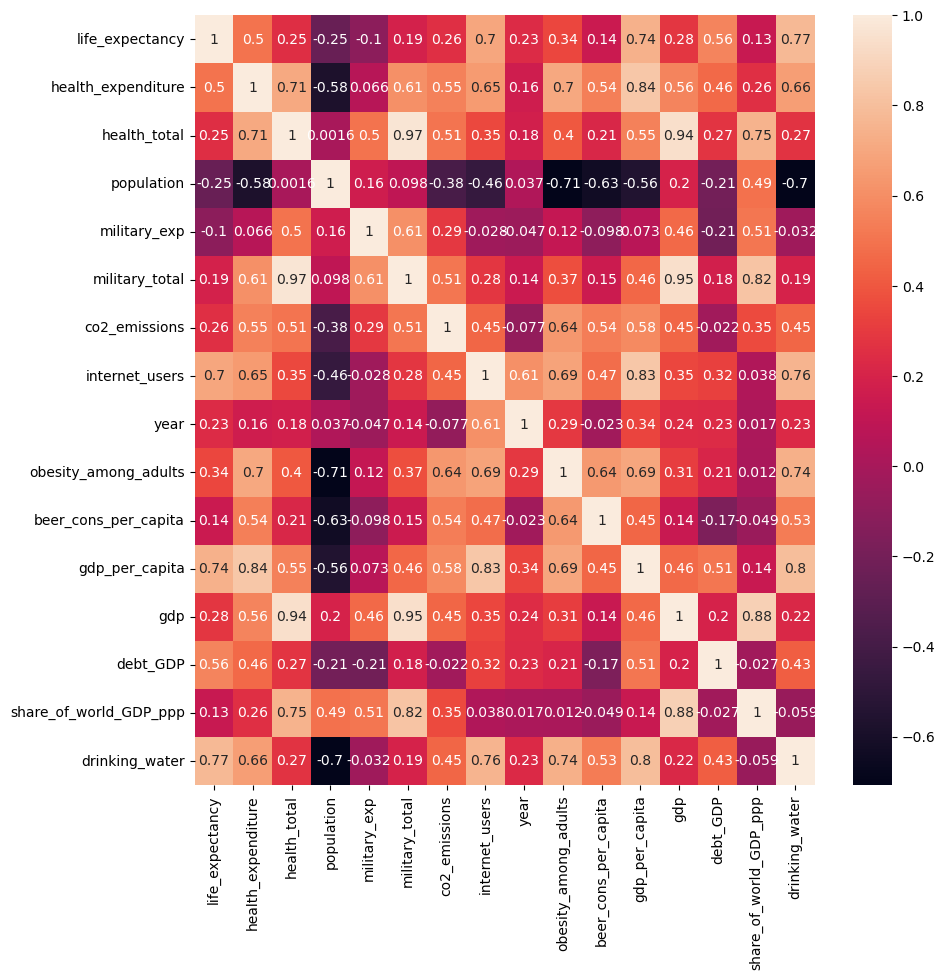

In [33]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

In [34]:
# Passe den Dateipfad entsprechend an
file_path = r'C:\Users\Lenovo\OneDrive\Dokumente\CareerFoundry\Data Immersion\6. Advanced Analytics and Dashboard Design\BRICS\04 Analysis\Visualizations'

# Speichere die Grafik ab
f.savefig(file_path + '\\World_heatmap.png')

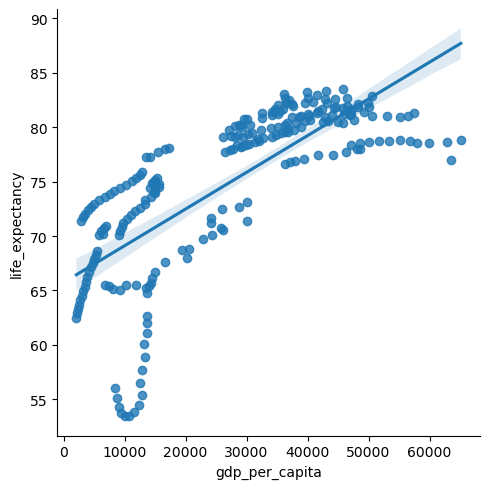

In [35]:
# Create a scatterplot for the gdp_per_capita and life_expectancy columns in seaborn

sns.lmplot(x = 'gdp_per_capita', y = 'life_expectancy', data = df)

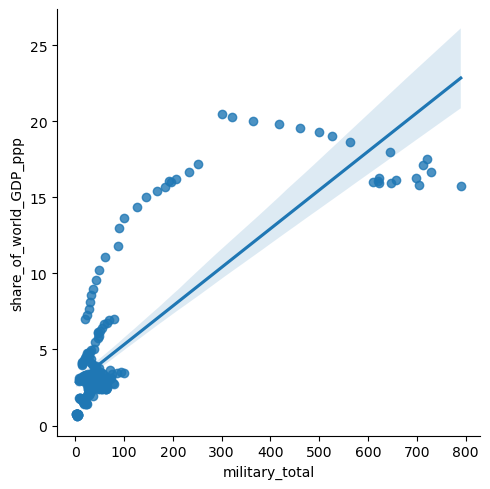

In [36]:
# Create a scatterplot for the military_total and share_of_world_GDP_ppp columns in seaborn

sns.lmplot(x = 'military_total', y = 'share_of_world_GDP_ppp', data = df)

#### G6 heatmap

In [37]:
# Create a subplot with matplotlib
#f_g6,ax = plt.subplots(figsize=(10,10))

# g6 Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
#corr_g6 = sns.heatmap(sub_g6.corr(), annot = True, ax = ax) 

In [38]:
# Passe den Dateipfad entsprechend an
#file_path = r'C:\Users\Lenovo\OneDrive\Dokumente\CareerFoundry\Data Immersion\6. Advanced Analytics and Dashboard Design\BRICS\04 Analysis\Visualizations'

# Speichere die Grafik ab
#f_g6.savefig(file_path + '\\G6_heatmap.png')

#### BRICS heatmap

In [39]:
# Create a subplot with matplotlib
#f_brics,ax = plt.subplots(figsize=(10,10))

# brics Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
#corr_brics = sns.heatmap(sub_brics.corr(), annot = True, ax = ax) 

In [40]:
# Passe den Dateipfad entsprechend an
#file_path = r'C:\Users\Lenovo\OneDrive\Dokumente\CareerFoundry\Data Immersion\6. Advanced Analytics and Dashboard Design\BRICS\04 Analysis\Visualizations'

# Speichere die Grafik ab
#f_brics.savefig(file_path + '\\BRICS_heatmap.png')

#### Answer to Question 2

I compared the G7 heatmap with the BRICS heatmap
                correlation	correlation
Variables		G7	BRICS
life_expectancy/gdp	-0,54	0,61
life_expectancy/population	-0,63	0,39
gdp/health_expenditure	0,91	-0,44
gdp_per_capita/population	0,53	-0,56
health_expenditure/military_exp	0,72	-0,57

In G7 countries there is a strong correlation between the expenditures of military and health, while in brics countries there is a strong negative correlation. 
Either military or health expenditures is the question for those countries. Worldwide there is no correlation (-0,06).


### plots

#### co2_emissions and military_exp

In [41]:
# g7 Create a scatterplot for the co2_emissions and military_exp columns in seaborn

#sns.lmplot(x = 'co2_emissions', y = 'military_exp', data = df)

In [42]:
# brics Create a scatterplot for the co2_emissions and military_exp columns in seaborn
#
#sns.lmplot(x = 'co2_emissions', y = 'military_exp', data = df_brics)

#### in both dataframes the regreesion line is rising with many outliers on both sides

#### obesity_among_adults and life_expectancy

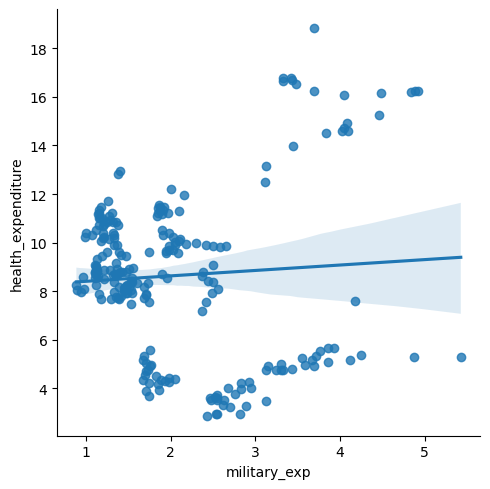

In [43]:
# g7 Create a scatterplot for 'obesity_among_adults' and 'life_expectancy' columns in seaborn

sns.lmplot(x = 'military_exp', y = 'health_expenditure', data = df)

In [44]:
# brics Create a scatterplot for 'obesity_among_adults' and 'life_expectancy' columns in seaborn

#sns.lmplot(x = 'military_exp', y = 'health_expenditure', data = df_brics)

#### The regression lines of the plots are different. This is probabaly something worth further investigations over time

### pairplots

In [45]:
df.columns

Index(['date', 'country', 'continent', 'life_expectancy', 'population',
       'co2_emissions', 'health_expenditure', 'gdp_per_capita',
       'internet_users', 'military_exp', 'open_defecation', 'drinking_water',
       'obesity_among_adults', 'beer_cons_per_capita', 'account_balance',
       'account_balance_GDP', 'debt_GDP', 'gdp', 'share_of_world_GDP_ppp',
       'year', 'health_total', 'military_total', 'debt_total', 'brics_flag',
       'g6_flag', 'us_brics_flag'],
      dtype='object')

In [46]:
# Keep only the variables you want to use in the pair plot

#sub_3 = sub[['life_expectancy', 'gdp_per_capita', 'population', 'military_exp']]

In [47]:
# Create a pair plot 

#g = sns.pairplot(sub_3)

In [48]:
# Keep only the variables you want to use in the pair plot

#sub_2 = sub[['life_expectancy', 'co2_emissions', 'health_expenditure', 'military_exp', 'gdp_per_capita', 'population', 'obesity_among_adults']]

In [49]:
# Create a pair plot 

#g = sns.pairplot(sub_2)

#### G7 pairplots

In [50]:
# Keep only the variables you want to use in the pair plot

#sub_3_g7 = sub[['life_expectancy', 'gdp_per_capita', 'population', 'obesity_among_adults']]

In [51]:
# Create a pair plot 

#g = sns.pairplot(sub_3_g7)

In [52]:
# Keep only the variables you want to use in the pair plot

#sub_2_g7 = sub[['life_expectancy', 'co2_emissions', 'health_expenditure', 'military_exp', 'gdp_per_capita', 'population', 'obesity_among_adults']]

In [53]:
# Create a pair plot 

#g = sns.pairplot(sub_2_g7)

#### BRICS pairplots

In [54]:
# Keep only the variables you want to use in the pair plot

sub_2_brics = sub_brics[['life_expectancy', 'co2_emissions', 'health_expenditure', 'military_exp', 'gdp_per_capita', 'population', 'obesity_among_adults']]

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

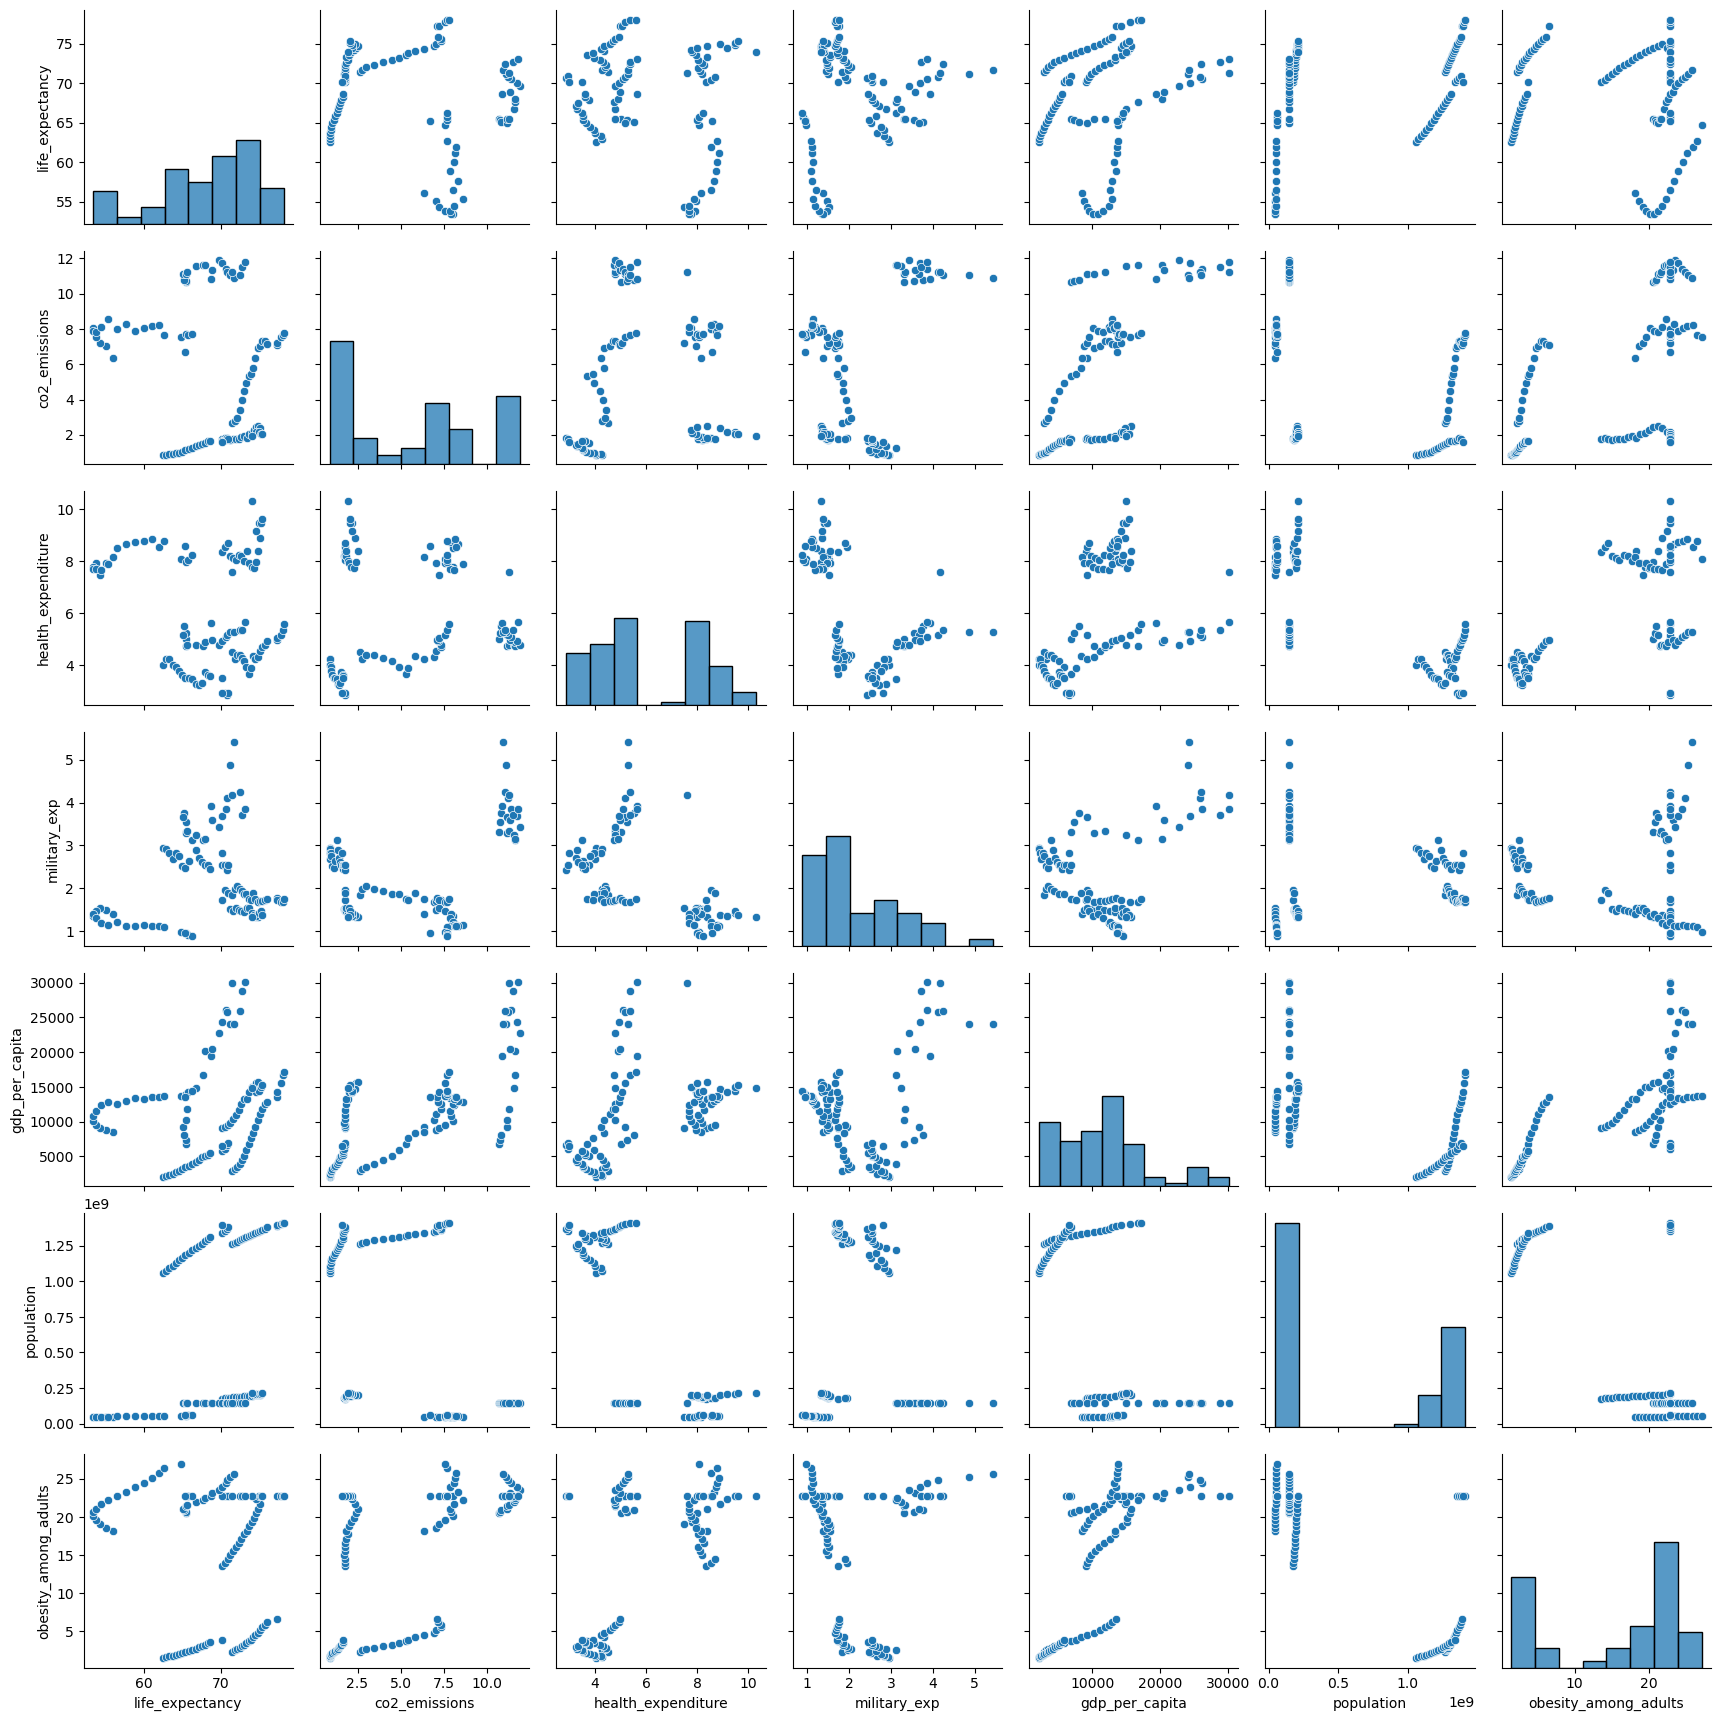

In [55]:
# Create a pair plot 

g1 = sns.pairplot(sub_2_brics)

In [56]:
# Passe den Dateipfad entsprechend an
file_path = r'C:\Users\Lenovo\OneDrive\Dokumente\CareerFoundry\Data Immersion\6. Advanced Analytics and Dashboard Design\BRICS\04 Analysis\Visualizations'

# Speichere die Grafik ab
g1.savefig(file_path + '\\Pair Plot.png')

### Categorical plots

#### life_expectancy for world, g7, and brics

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='life_expectancy', ylabel='Count'>

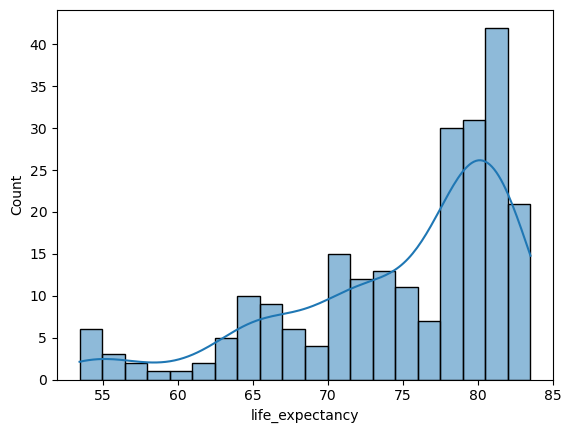

In [57]:
sns.histplot(df['life_expectancy'], bins = 20, kde = True)

In [58]:
df.columns

Index(['date', 'country', 'continent', 'life_expectancy', 'population',
       'co2_emissions', 'health_expenditure', 'gdp_per_capita',
       'internet_users', 'military_exp', 'open_defecation', 'drinking_water',
       'obesity_among_adults', 'beer_cons_per_capita', 'account_balance',
       'account_balance_GDP', 'debt_GDP', 'gdp', 'share_of_world_GDP_ppp',
       'year', 'health_total', 'military_total', 'debt_total', 'brics_flag',
       'g6_flag', 'us_brics_flag'],
      dtype='object')

### catplots 

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


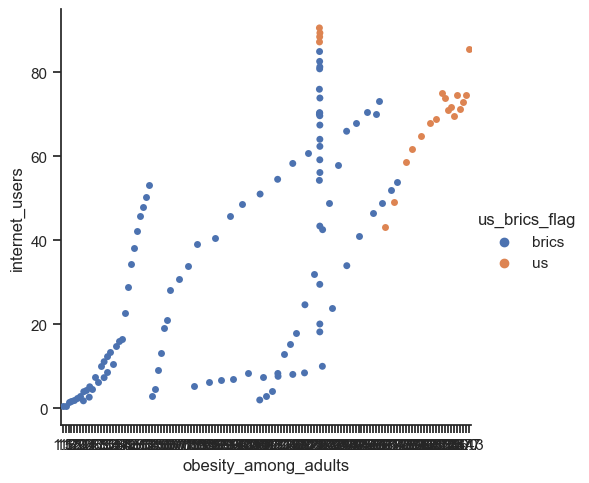

In [59]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="obesity_among_adults", y="internet_users", hue="us_brics_flag", data=df)

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


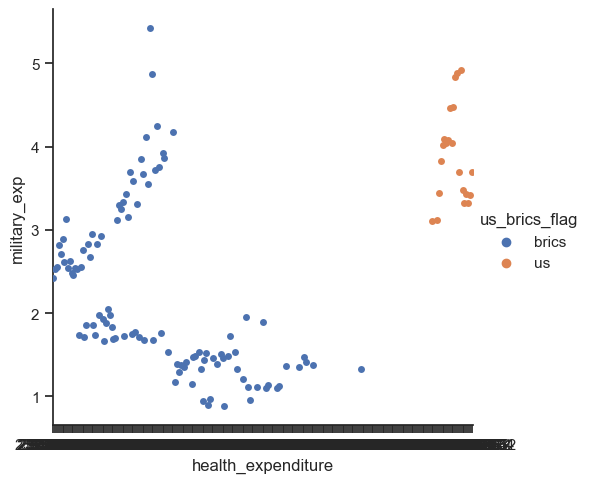

In [60]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="health_expenditure", y="military_exp", hue="us_brics_flag", data=df)

In [61]:
# Passe den Dateipfad entsprechend an
file_path = r'C:\Users\Lenovo\OneDrive\Dokumente\CareerFoundry\Data Immersion\6. Advanced Analytics and Dashboard Design\BRICS\04 Analysis\Visualizations'

# Speichere die Grafik ab
g.savefig(file_path + '\\Catplot.png')

#### 6.	Revisit the questions...
you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

Do BRICS countries have to decide between health and military expenditures?


Are BRICS preparing for millitary confrontation ?
New questions: How has military_exp changed over time?
How has military_exp/health_expenditure changed over time? BRICS and G7
military_gdp over time?

Are BRICS caring for the people ?
New questions: How has health_expenditure changed over time?
Development of health_gdp, Internet_users, drinking_water

Do BRICS countries have an adequate medical care?
New question: How has life_expectancy changed over time?

Are hapiness factors in BRICS countries comparable to western civilizations?
New question: And how have they changed?

How can a happiness factor be defined?


## 05 Geographical Visulization

In [62]:
# Import new libraries
import folium
import json

In [63]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [64]:
# Annahme: Hier verwenden wir os.path.join(), um Pfade zu erstellen
geojson_file = 'countries.geojson'

# Vollständigen Pfad für die GeoJSON-Datei erstellen
country_geo = os.path.join(path, '02 Data', 'Original Data', geojson_file)

# Jetzt können Sie den Pfad verwenden, um die Datei zu importieren
# Beispiel: gpd.read_file(country_geo)

In [65]:
# Renaming columns
df["country"].replace({"Russian Federation": "Russia", "United States": "United States of America"}, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_109220\653167021.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["country"].replace({"Russian Federation": "Russia", "United States": "United States of America"}, inplace=True)


In [66]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = df[['country','military_exp']].groupby('country')['military_exp'].sum()

data_to_plot

country
Brazil                      31.291321
Canada                      24.821849
China                       37.687658
France                      41.088796
Germany                     25.851316
India                       56.350044
Italy                       31.582104
Russia                      79.319970
South Africa                24.773505
United Kingdom              48.677126
United States of America    81.746096
Name: military_exp, dtype: float64

In [67]:
# Setup a folium map at a high-level zoom
#map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
#folium.Choropleth(
   # geo_data = country_geo, 
#data = data_to_plot,
   # columns = ['country', 'military_exp'],
   # key_on = 'feature.properties.ADMIN', 
    #fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    #legend_name = "military_exp").add_to(map)
#folium.LayerControl().add_to(map)

map

map

## 06 Regression

### Data Preperation for Regression Analysis

##### BRICS

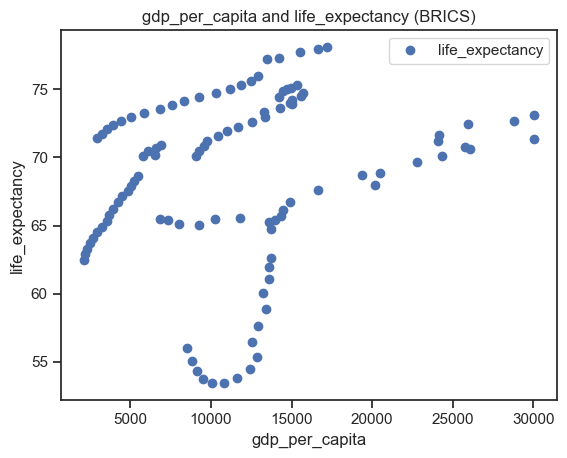

In [68]:
# BRICS Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_brics.plot(x = 'gdp_per_capita', y='life_expectancy',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('gdp_per_capita and life_expectancy (BRICS)')  
plt.xlabel('gdp_per_capita')  
plt.ylabel('life_expectancy')  
plt.show()

In [69]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_brics = df_brics['gdp_per_capita'].values.reshape(-1,1)
y_brics = df_brics['life_expectancy'].values.reshape(-1,1)

In [70]:
# Split data into a training set and a test set.

X_train_brics, X_test_brics, y_train_brics, y_test_brics = train_test_split(X_brics, y_brics, test_size=0.3, random_state=0)

### Regression analysis

In [74]:
##### BRICS

In [75]:
# Create a regression object.

regression_brics = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [76]:
# Fit the regression object onto the training set.

regression_brics.fit(X_train_brics, y_train_brics)

LinearRegression()

In [77]:
# Predict the values of y using X.

y_predicted_brics = regression_brics.predict(X_test_brics)

### Plots

In [78]:
df.columns

Index(['date', 'country', 'continent', 'life_expectancy', 'population',
       'co2_emissions', 'health_expenditure', 'gdp_per_capita',
       'internet_users', 'military_exp', 'open_defecation', 'drinking_water',
       'obesity_among_adults', 'beer_cons_per_capita', 'account_balance',
       'account_balance_GDP', 'debt_GDP', 'gdp', 'share_of_world_GDP_ppp',
       'year', 'health_total', 'military_total', 'debt_total', 'brics_flag',
       'g6_flag', 'us_brics_flag'],
      dtype='object')

#### Test sets

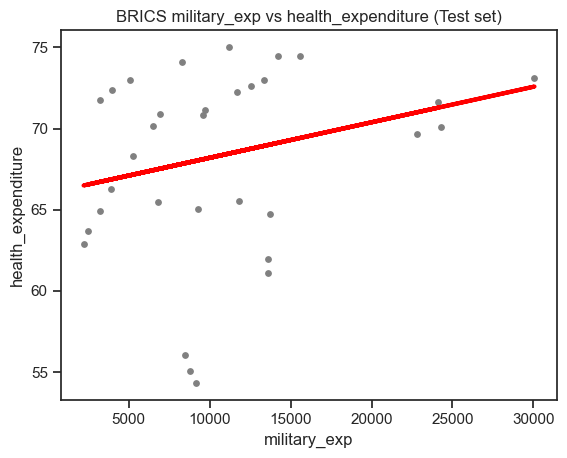

In [80]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_brics = plt
plot_test_brics.scatter(X_test_brics, y_test_brics, color='gray', s = 15)
plot_test_brics.plot(X_test_brics, y_predicted_brics, color='red', linewidth =3)
plot_test_brics.title('BRICS military_exp vs health_expenditure (Test set)')
plot_test_brics.xlabel('military_exp')
plot_test_brics.ylabel('health_expenditure')
plot_test_brics.show()

#### Training sets

##### BRICS

In [81]:
# Create objects that contain the model summary statistics.

rmse_brics = mean_squared_error(y_test_brics, y_predicted_brics) # This is the mean squared error
r2_brics = r2_score(y_test_brics, y_predicted_brics) # This is the R2 score. 

In [82]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_brics.coef_)
print('Mean squared error: ', rmse_brics)
print('R2 score: ', r2_brics)

Slope: [[0.00021877]]
Mean squared error:  30.656481446427115
R2 score:  0.05630613975377208


In [83]:
# Create a dataframe comparing the actual and predicted values of y.

data_brics = pd.DataFrame({'Actual': y_test_brics.flatten(), 'Predicted': y_predicted_brics.flatten()})
data_brics.head(10)

,Actual,Predicted
0,72.985,67.115492
1,70.910,67.518326
2,70.813,68.100867
3,70.150,67.435192
4,55.089,67.933691
5,64.918,66.718279
6,74.442,69.117616
7,64.747,69.005607
8,68.286,67.154319
9,63.699,66.550321


In [84]:
# Predict.

y_predicted_train_brics = regression_brics.predict(X_train_brics) # This is predicting X_train!

In [85]:
rmse2_brics = mean_squared_error(y_train_brics, y_predicted_train_brics)
r22_brics = r2_score(y_train_brics, y_predicted_train_brics)

In [86]:
print('Slope:' ,regression_brics.coef_)
print('Mean squared error: ', rmse2_brics)
print('R2 score: ', r22_brics)

Slope: [[0.00021877]]
Mean squared error:  40.73089013055542
R2 score:  0.04571228962430285


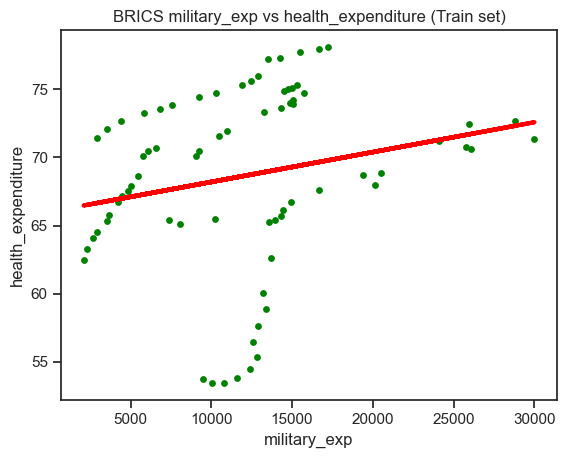

In [87]:
# Annahme: X_train_brics, y_train_brics und y_predicted_train_brics sind Ihre Trainingsdaten und Vorhersagen
# Visualisierung der Trainingsdaten
plt.scatter(X_train_brics, y_train_brics, color='green', s=15)
plt.plot(X_train_brics, y_predicted_train_brics, color='red', linewidth=3)
plt.title('BRICS military_exp vs health_expenditure (Train set)')
plt.xlabel('military_exp')
plt.ylabel('health_expenditure')

# Passe den Dateipfad entsprechend an
file_path_train_plot = r'C:\Users\Lenovo\OneDrive\Dokumente\CareerFoundry\Data Immersion\6. Advanced Analytics and Dashboard Design\BRICS\04 Analysis\Visualizations\Train_Plot_BRICS.png'

# Speichern Sie die Visualisierung ab
plt.savefig(file_path_train_plot)

# Anzeigen der Visualisierung (optional)
plt.show()

### The R2 score for g6 is 0.58 and for brics 0.30 
The models are inaccurate.